# Initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from fun_gilles import *
import cmcrameri.cm as cmc
import pandas as pd

In [2]:
def plot(abundances, times, V, SPECIES, K_CONSTANTS):
    colors = cmc.berlin(np.linspace(0, 1, len(SPECIES)))

    # --- Create the figure and a 1-row, 3-column subplot grid ---
    # Using a wide figsize for a horizontal layout.
    fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True) 
    # Note: sharex=True is removed because we need the x-axis ticK_CONSTANTSs on all three plots, 
    # although they are the same (time).

    # --- Subplot 1 (Left): Concentration ---
    ax1 = axes[0]
    for i in range(len(SPECIES)):
        # Calculate Concentration = Abundance / Volume
        ax1.plot(times, abundances[:, i] / V, label=SPECIES[i], color=colors[i], alpha=0.9)
    ax1.grid(True, linestyle='--', alpha=0.3)
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Concentration")
    ax1.set_title("Concentration Evolution")
    ax1.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title="SPECIES")


    # --- Subplot 2 (Middle): Volume ---
    ax2 = axes[1]
    ax2.plot(times, V, color='gray')
    ax2.grid(True, linestyle='--', alpha=0.3)
    ax2.set_xlabel("Time")
    ax2.set_ylabel("Volume")
    ax2.set_title("Volume Evolution")


    # --- Final Touches ---
    # Add a figure-wide title
    # Assuming K_CONSTANTS is an array/list of rate constants
    if len(K_CONSTANTS) >= 8: # Check if there are constants for K_3 and K_4
        fig.suptitle(fr"Simulation with intermediates ($K_1$ = {K_CONSTANTS[1]/K_CONSTANTS[0]}, $K_2$ = {K_CONSTANTS[3]/K_CONSTANTS[2]}, $K_3$ = {K_CONSTANTS[5]/K_CONSTANTS[4]}, $K_4$ = {K_CONSTANTS[7]/K_CONSTANTS[6]})",
                    fontsize=16)
    elif len(K_CONSTANTS) >= 4: # Check if there are constants for at least K_1 and K_2
        fig.suptitle(fr"Simulation third-order ($K_1$ = {K_CONSTANTS[1]/K_CONSTANTS[0]}, $K_2$ = {K_CONSTANTS[3]/K_CONSTANTS[2]})",
                    fontsize=16)
    else:
        # Optional: Handle the case where K_CONSTANTS is too short
        fig.suptitle("Simulation Results (Incomplete K_CONSTANTS data)", fontsize=16)

    # These actions must run regardless of the title set, so they replace 'finally'
    plt.tight_layout(rect=[0, 0, 1, 1]) # Adjust tight_layout for a single row
    plt.show()

In [3]:
third_order = "../examples/third_order.txt"
intermediates = "../examples/reactions_autocat.txt"

# simulation
method = "Protocell"
initial_species = [1000]*4 + [1000]+[0]*3
initial_species_third = [1000]*5 + [0]
k_third_order = [1]*4
k_intermediates = [1]*8
V = 1000
iterations = 2e5
sp_intermediates = obtain_species(read_file(intermediates))
sp_thirdorder = obtain_species(read_file(third_order))


# Simulations

## Intermediarios

In [10]:
abundances, times, volumes = chemistry(method, iterations, intermediates, 
                                       initial_species, k_intermediates, V)

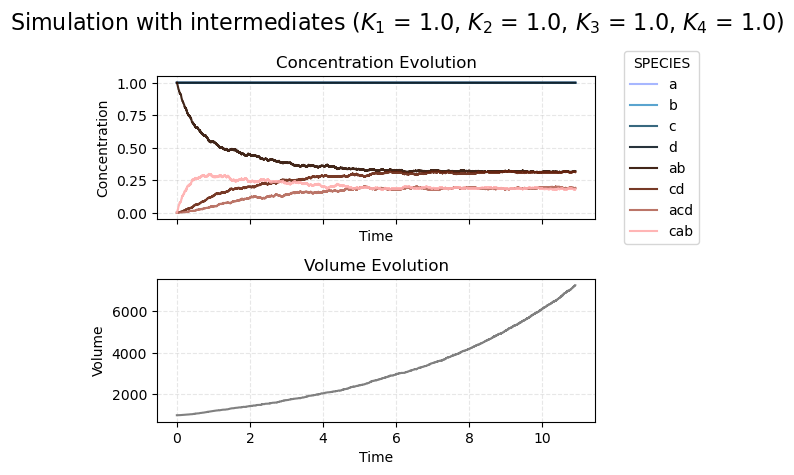

In [11]:
plot(abundances, times, volumes, sp_intermediates, k_intermediates)

## Third order

In [12]:
abundances, times, volumes = chemistry(method, iterations, third_order, 
                                       initial_species_third, k_third_order, V)

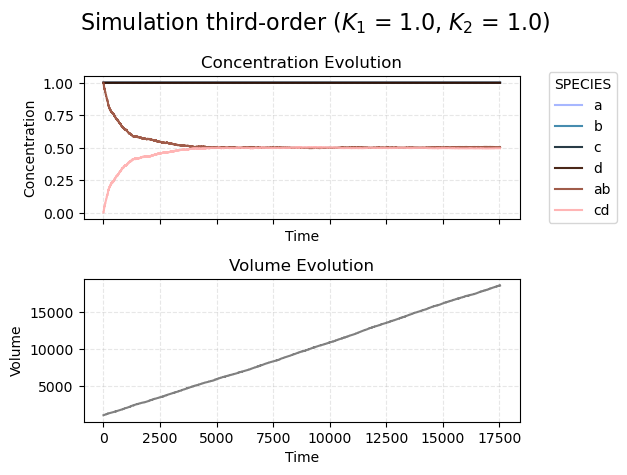

In [13]:
plot(abundances, times, volumes, sp_thirdorder, k_third_order)

## Para comparar lo que pasa cuando no funciona

In [15]:
initial_species = [1000]*4 + [8000]+[0]*3
initial_species_third = [1000]*4 + [8000] + [0]
k_third_order = [1]*4
k_intermediates = [1]*8
V = 1000
iterations = 2e5

### Intermediarios

In [16]:
abundances, times, volumes = chemistry(method, iterations, intermediates, 
                                       initial_species, k_intermediates, V)

Criterion for stop was # of iterations


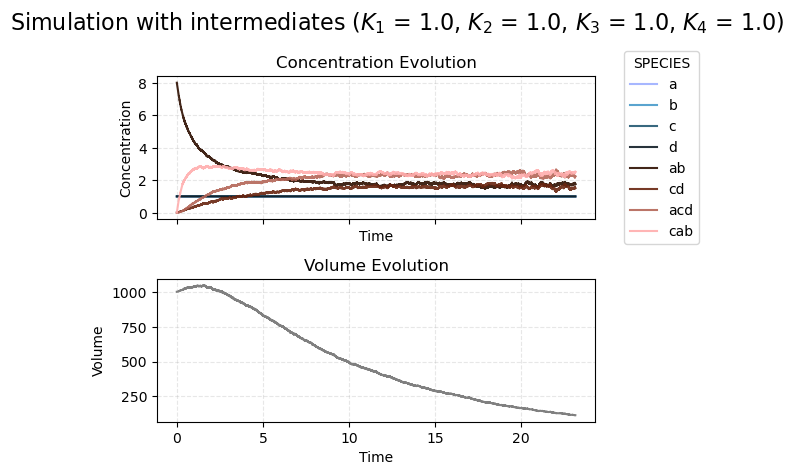

In [17]:
plot(abundances, times, volumes, sp_intermediates, k_intermediates)

### Third order

In [4]:
abundances, times, volumes = chemistry(method, iterations, third_order, 
                                       initial_species_third, k_third_order, V)

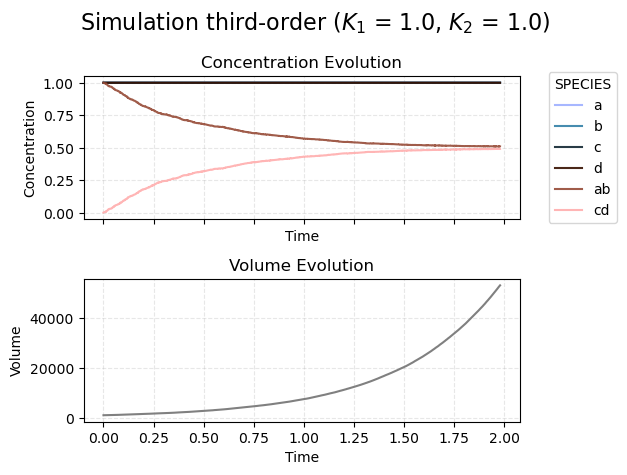

In [5]:
plot(abundances, times, volumes, sp_thirdorder, k_third_order)

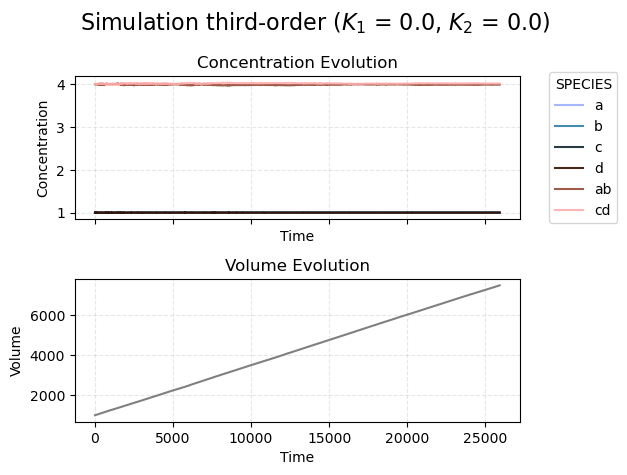

In [5]:
initial_species_third = [1000]*4 + [4000]*2
abundances, times, volumes = chemistry(method, iterations, third_order, 
                                       initial_species_third, k_third_order, V)
plot(abundances, times, volumes, sp_thirdorder, k_third_order)

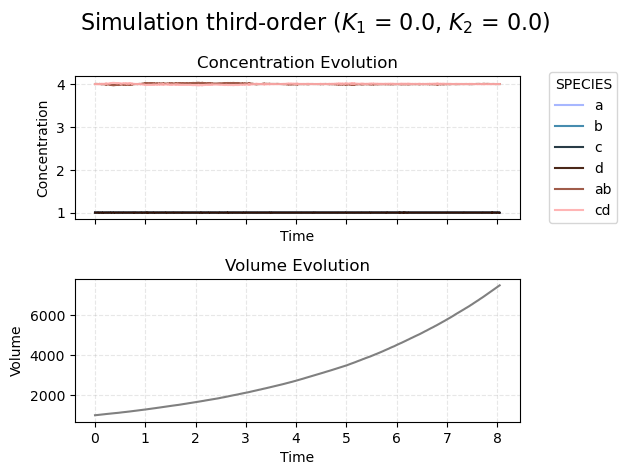

In [4]:
initial_species_third = [1000]*4 + [4000]*2
k_third_order = [1,0,1,0]
abundances, times, volumes = chemistry(method, iterations, third_order, 
                                       initial_species_third, k_third_order, V)
plot(abundances, times, volumes, sp_thirdorder, k_third_order)